# (P3) Plots `ab`

In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
names = {
  'nginx-rr':     'Nginx (round-robin)',
  'nginx-rrprio': 'Nginx (round-robin weights)',
  'nginx-iphash': 'Nginx (IP hashing)',
  'nginx-down':   'Nginx (SWAP2 down)',
  'haproxy-rr':     'HAProxy (round-robin)',
  'haproxy-rrprio': 'HAProxy (round-robin weights)',
  'haproxy-iphash': 'HAProxy (IP hashing)',
  'haproxy-down':   'HAProxy (SWAP2 down)',
  'gobetween-rr':     'gobetween (round-robin)',
  'gobetween-rrprio': 'gobetween (round-robin weights)',
  'gobetween-iphash': 'gobetween (IP hashing)',
  'gobetween-down':   'gobetween (SWAP2 down)',
  'zevenet-rr':     'Zevenet (round-robin)',
  'zevenet-rrprio': 'Zevenet (round-robin weights)',
  'zevenet-ipper':  'Zevenet (IP persistence)',
  'zevenet-down':   'Zevenet (SWAP2 down)'
}

data = {}
for key in names.keys():
  data[names[key]] = pd.read_csv(f'./{key}/e_1.csv')

In [3]:
def plot(names, title=None):
  plt.style.use('ggplot')
  figure(figsize=(8, 6), dpi=300)
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
  for i, name in enumerate(names):
    plt.plot(data[name]["Percentage served"], data[name]["Time in ms"], color=colors[i], linestyle='--', label=name)
  plt.legend()
  plt.xlabel('Percentage served')
  plt.ylabel('Time (ms)')
  if title: plt.title(title)

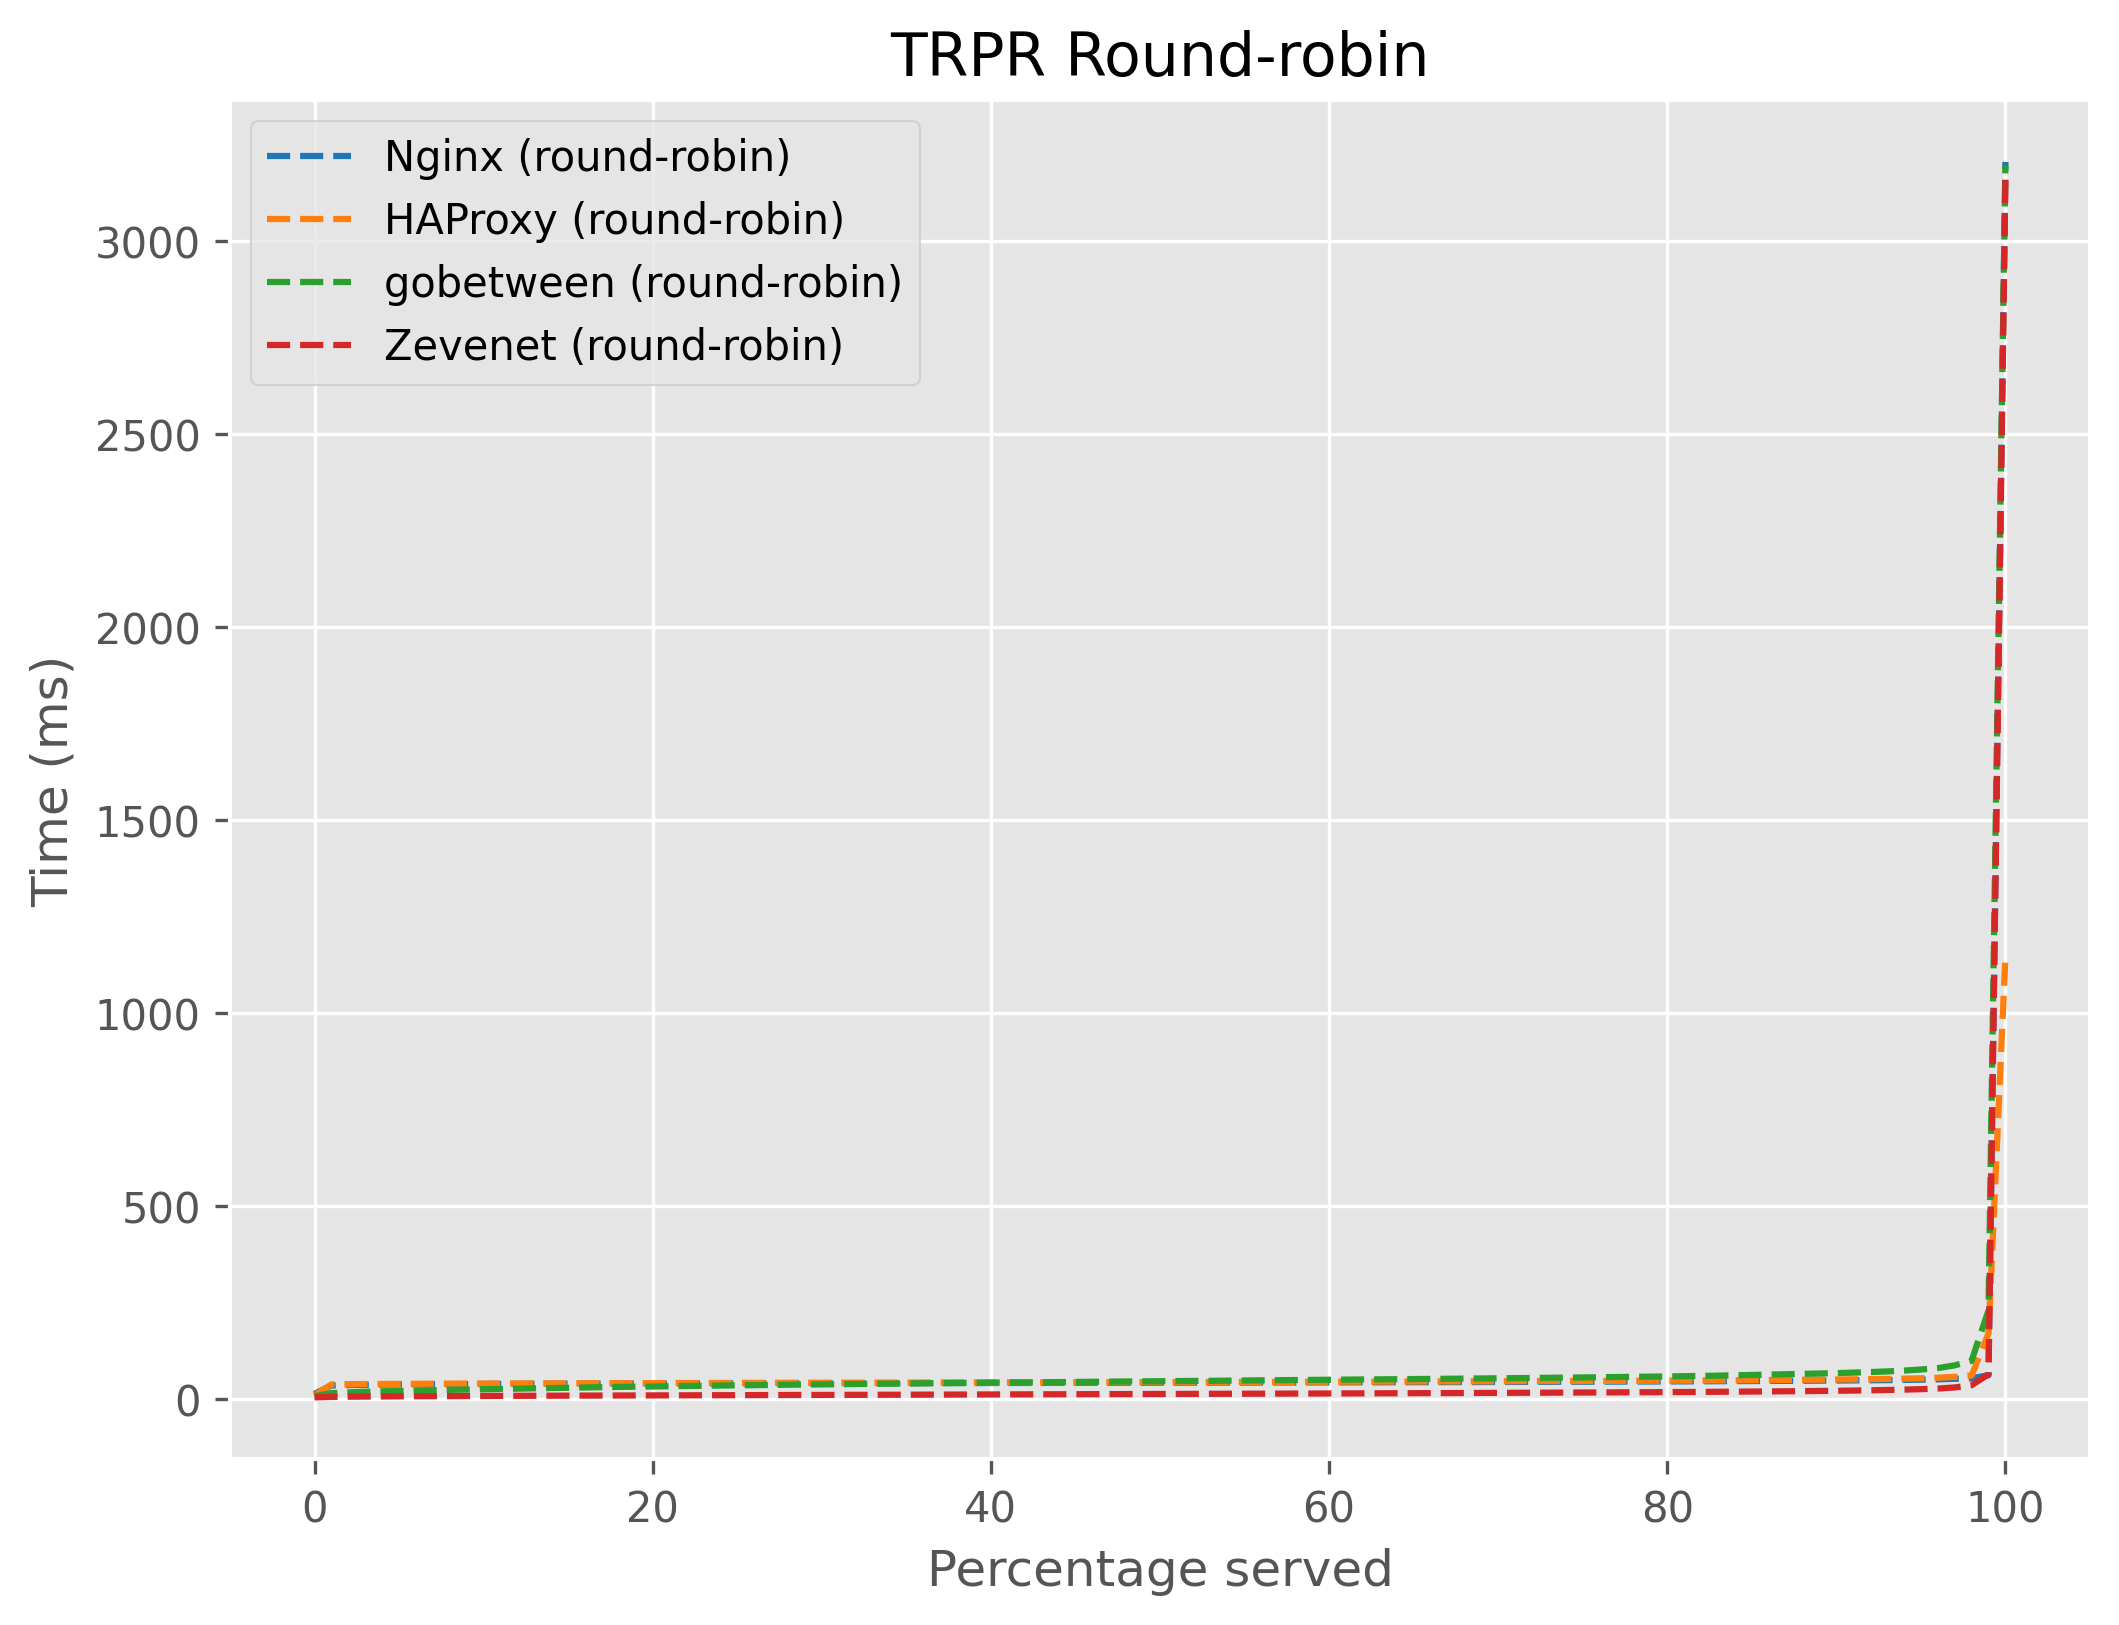

In [6]:
plot([name for name in data.keys() if '(round-robin)' in name], 'TRPR Round-robin')

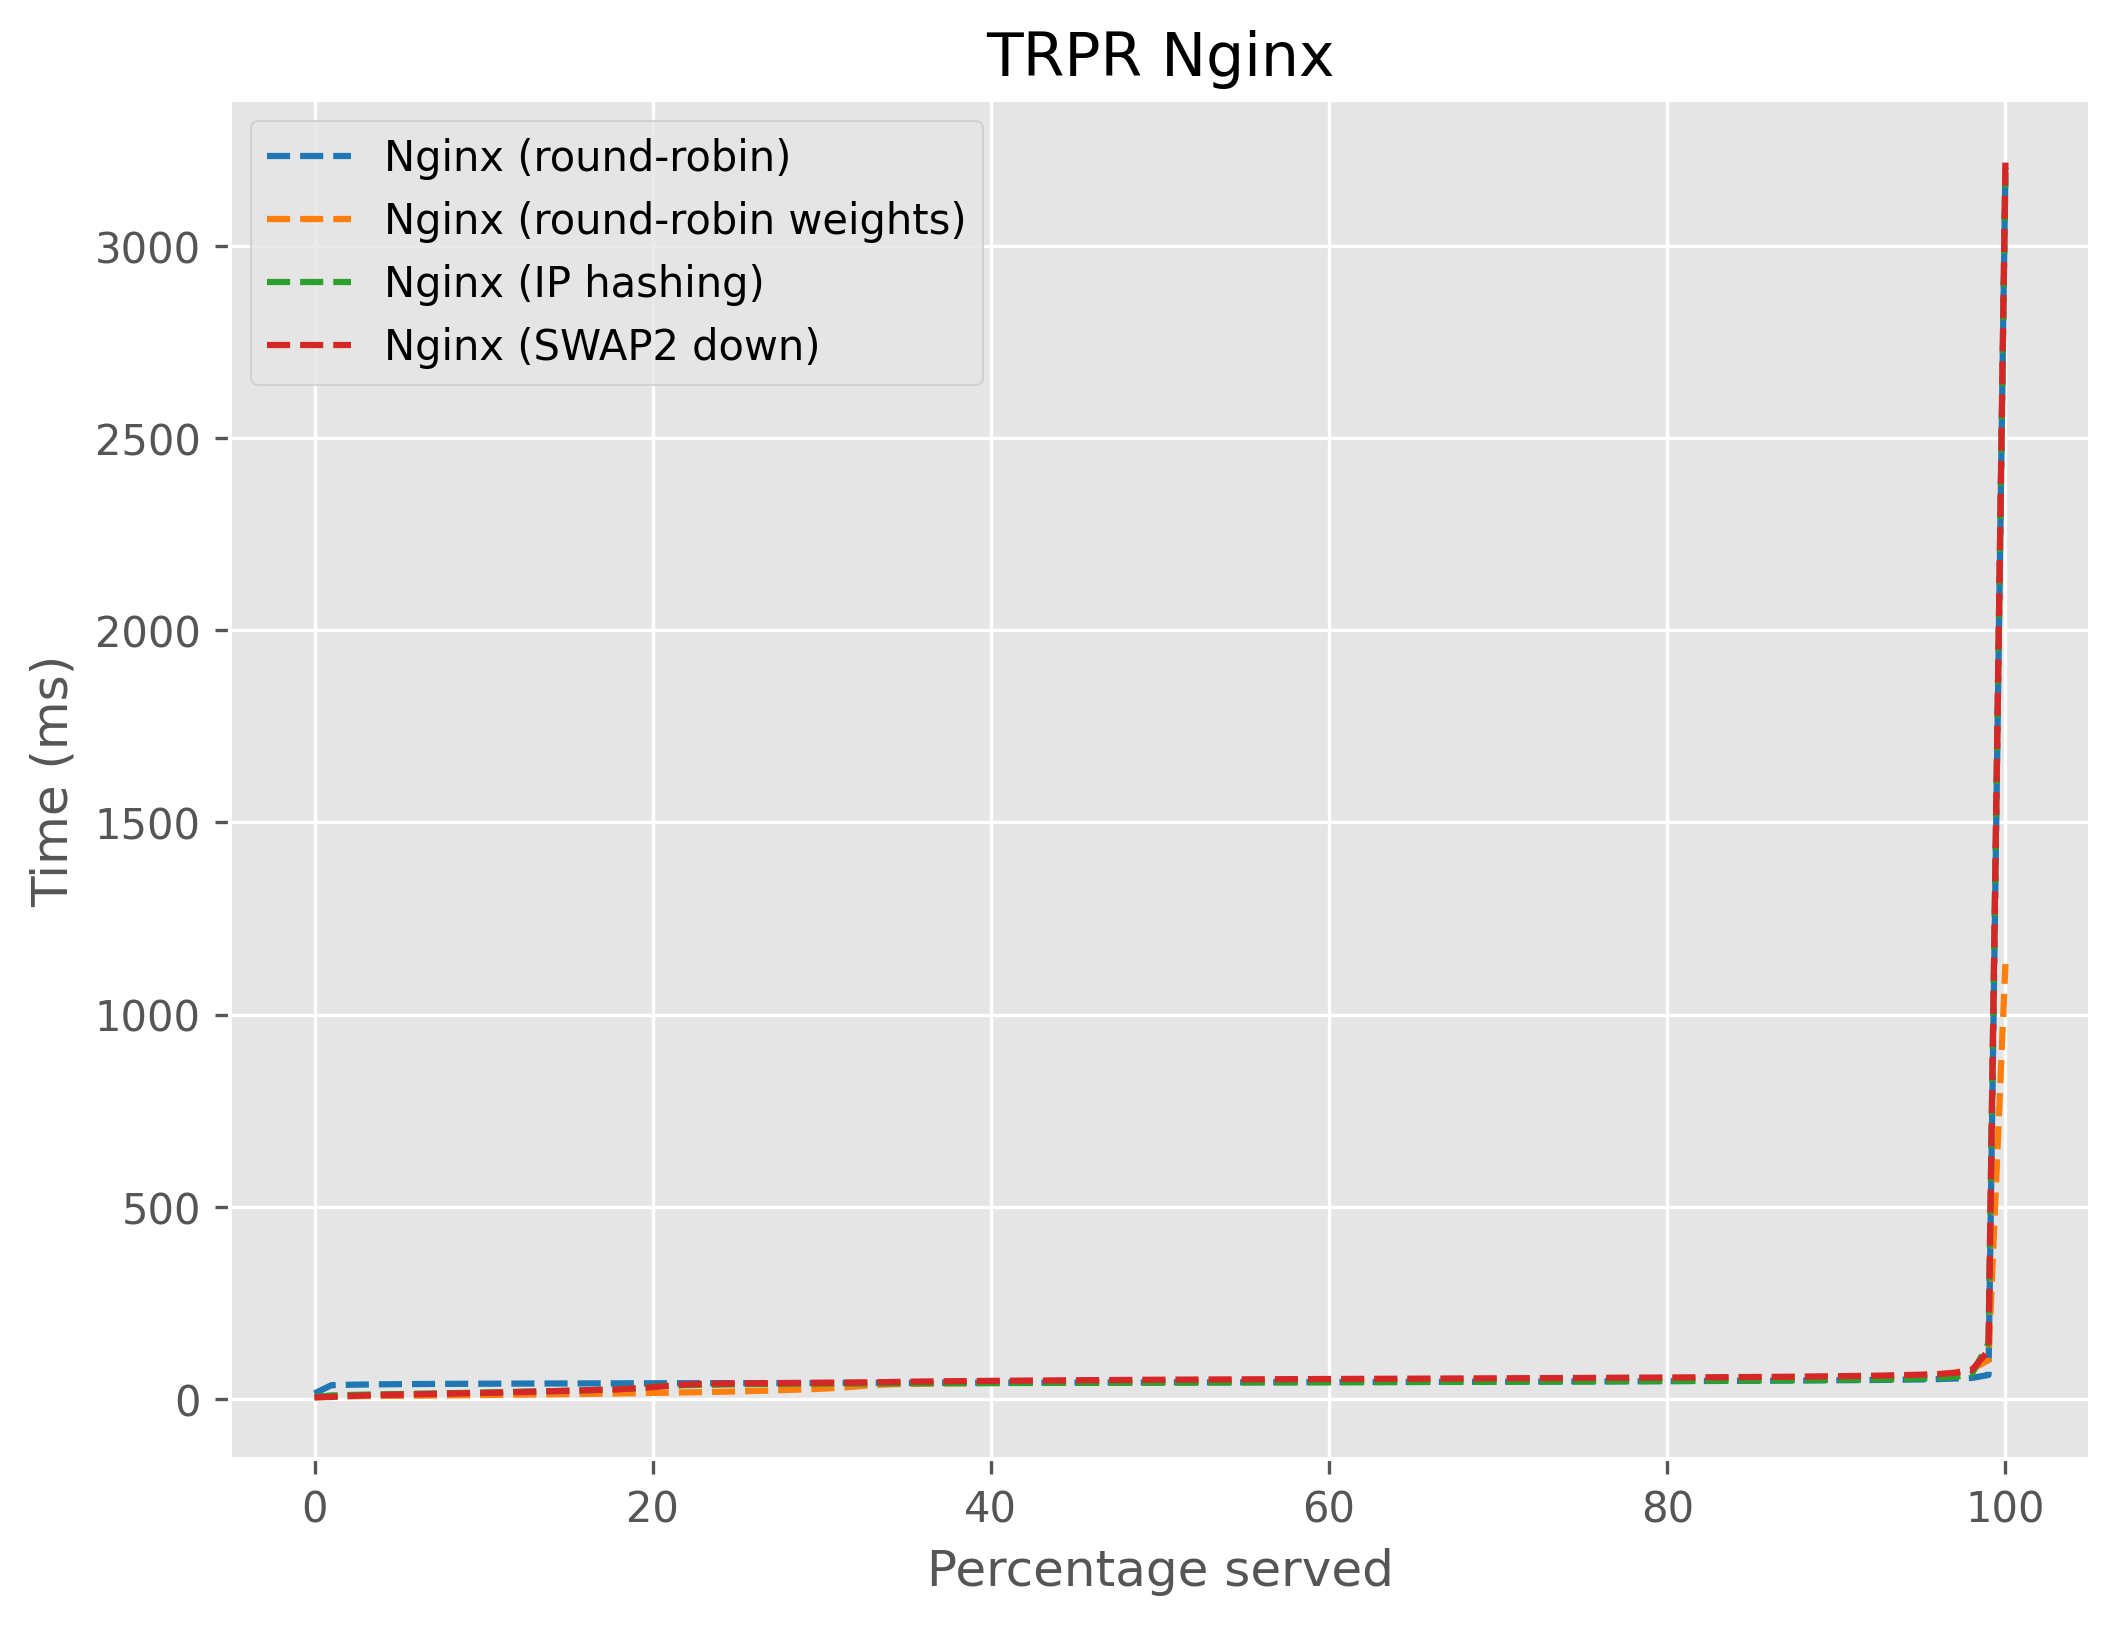

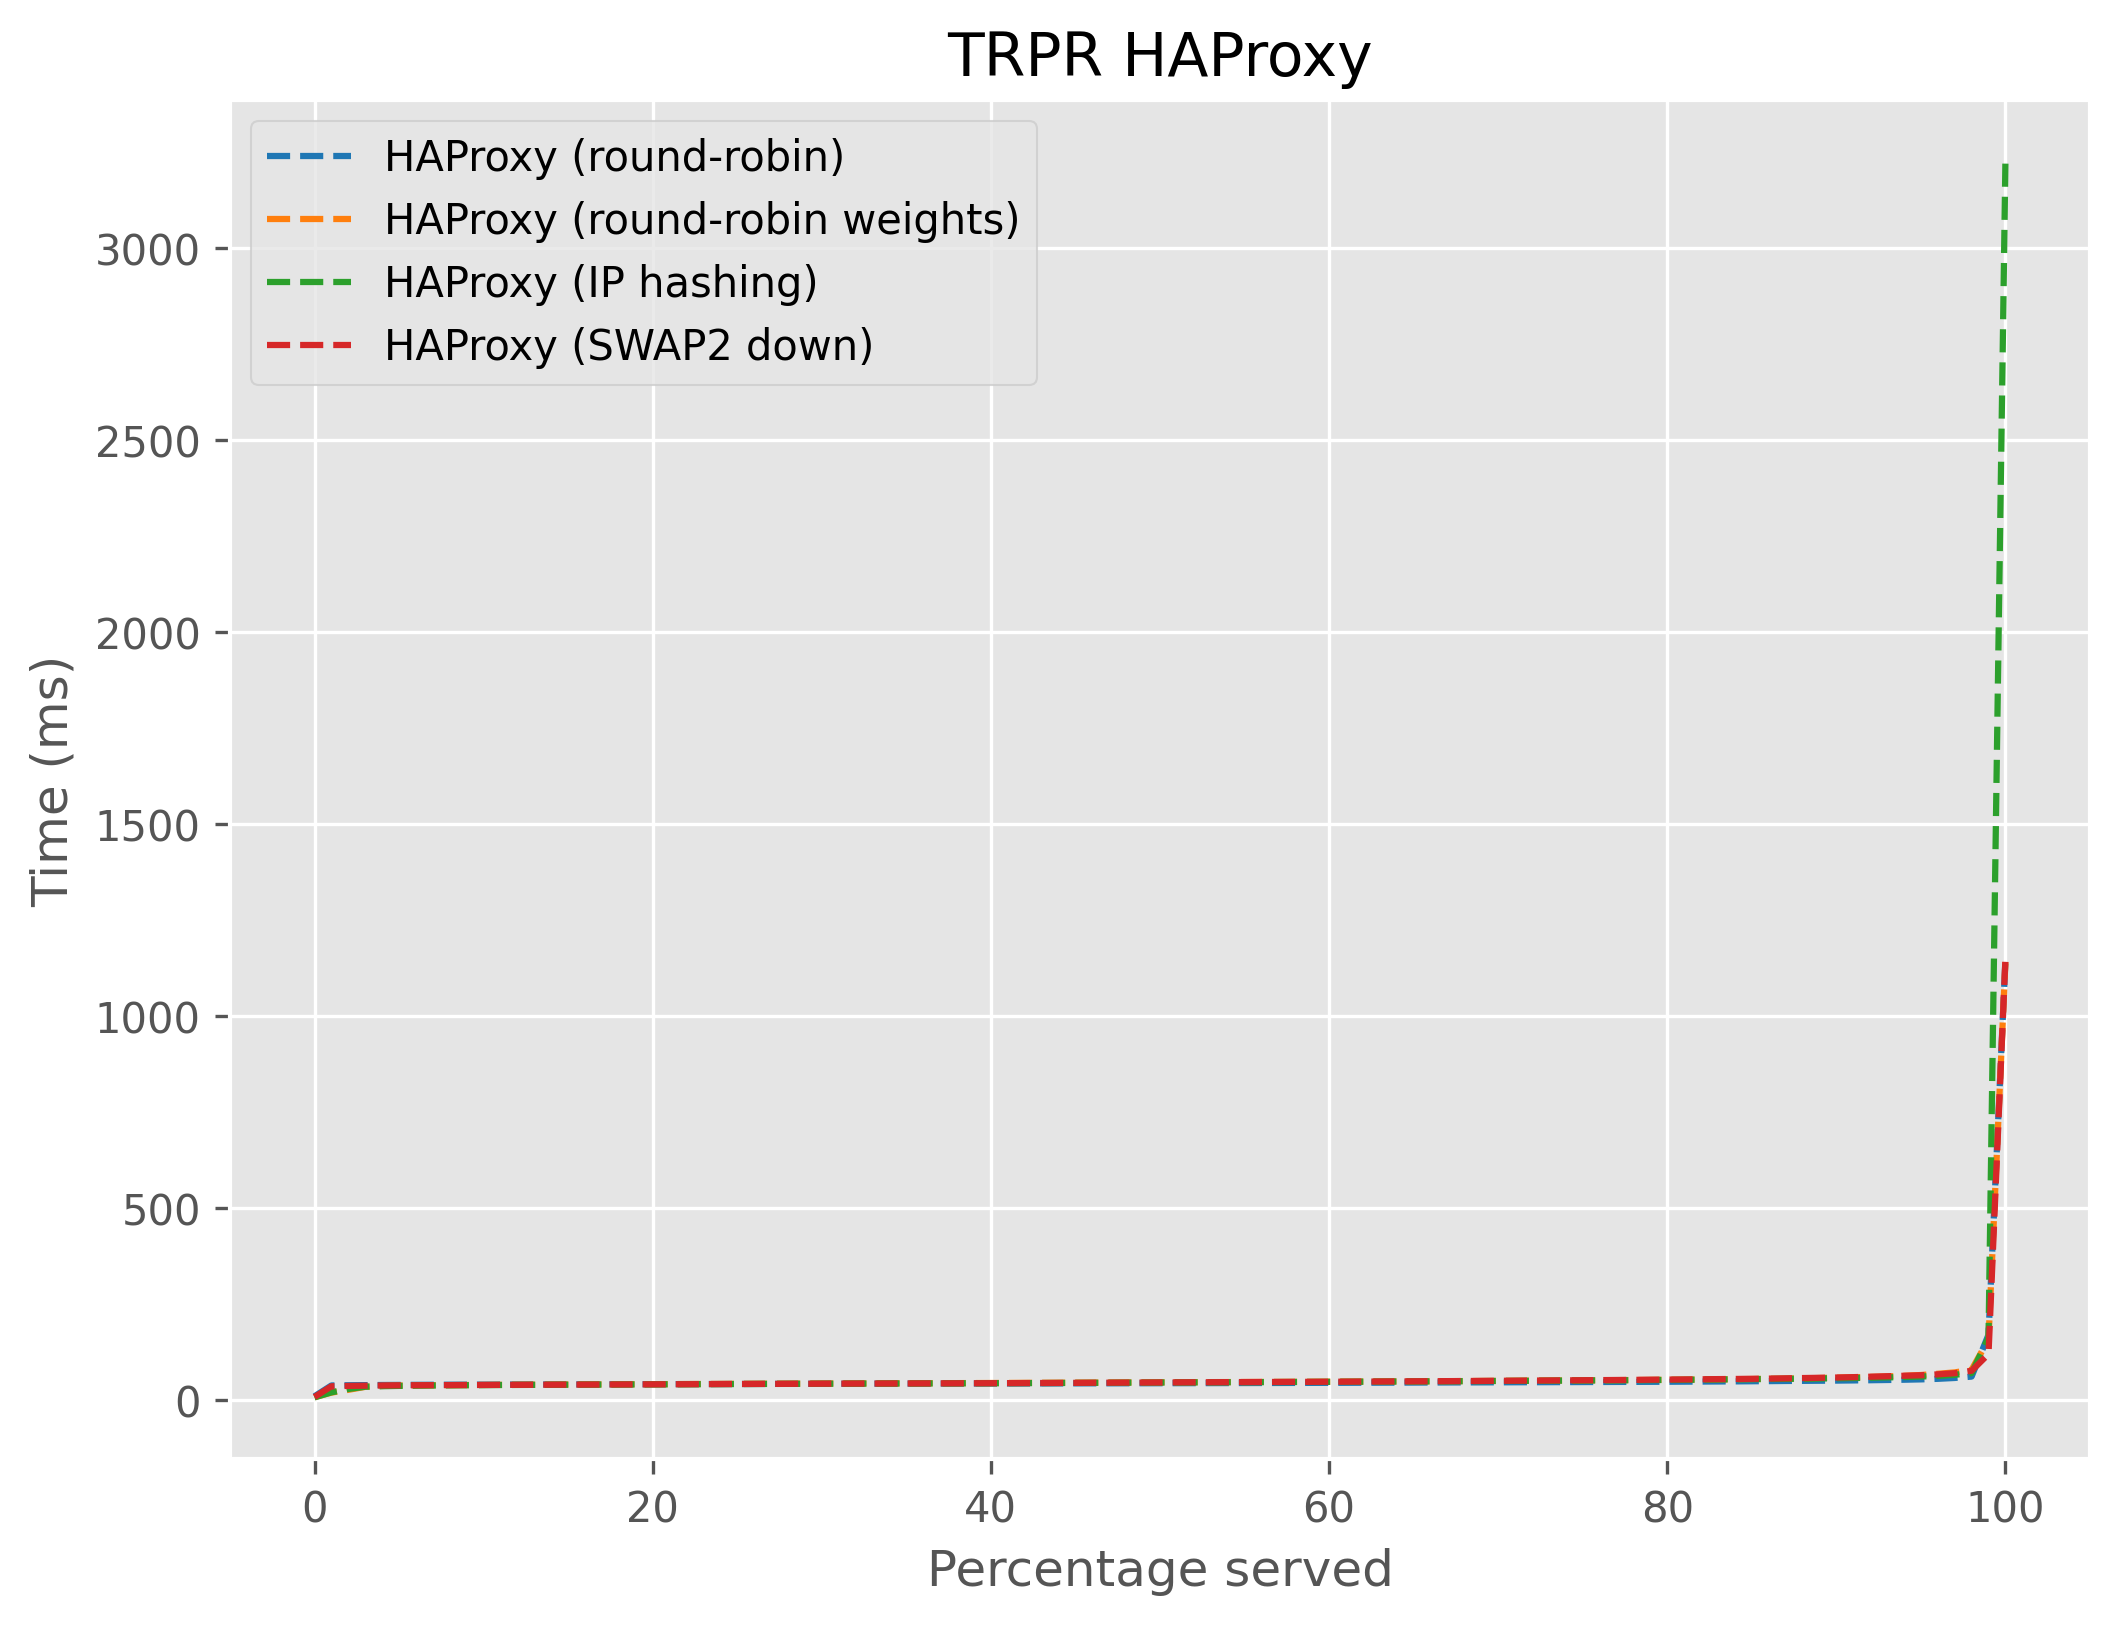

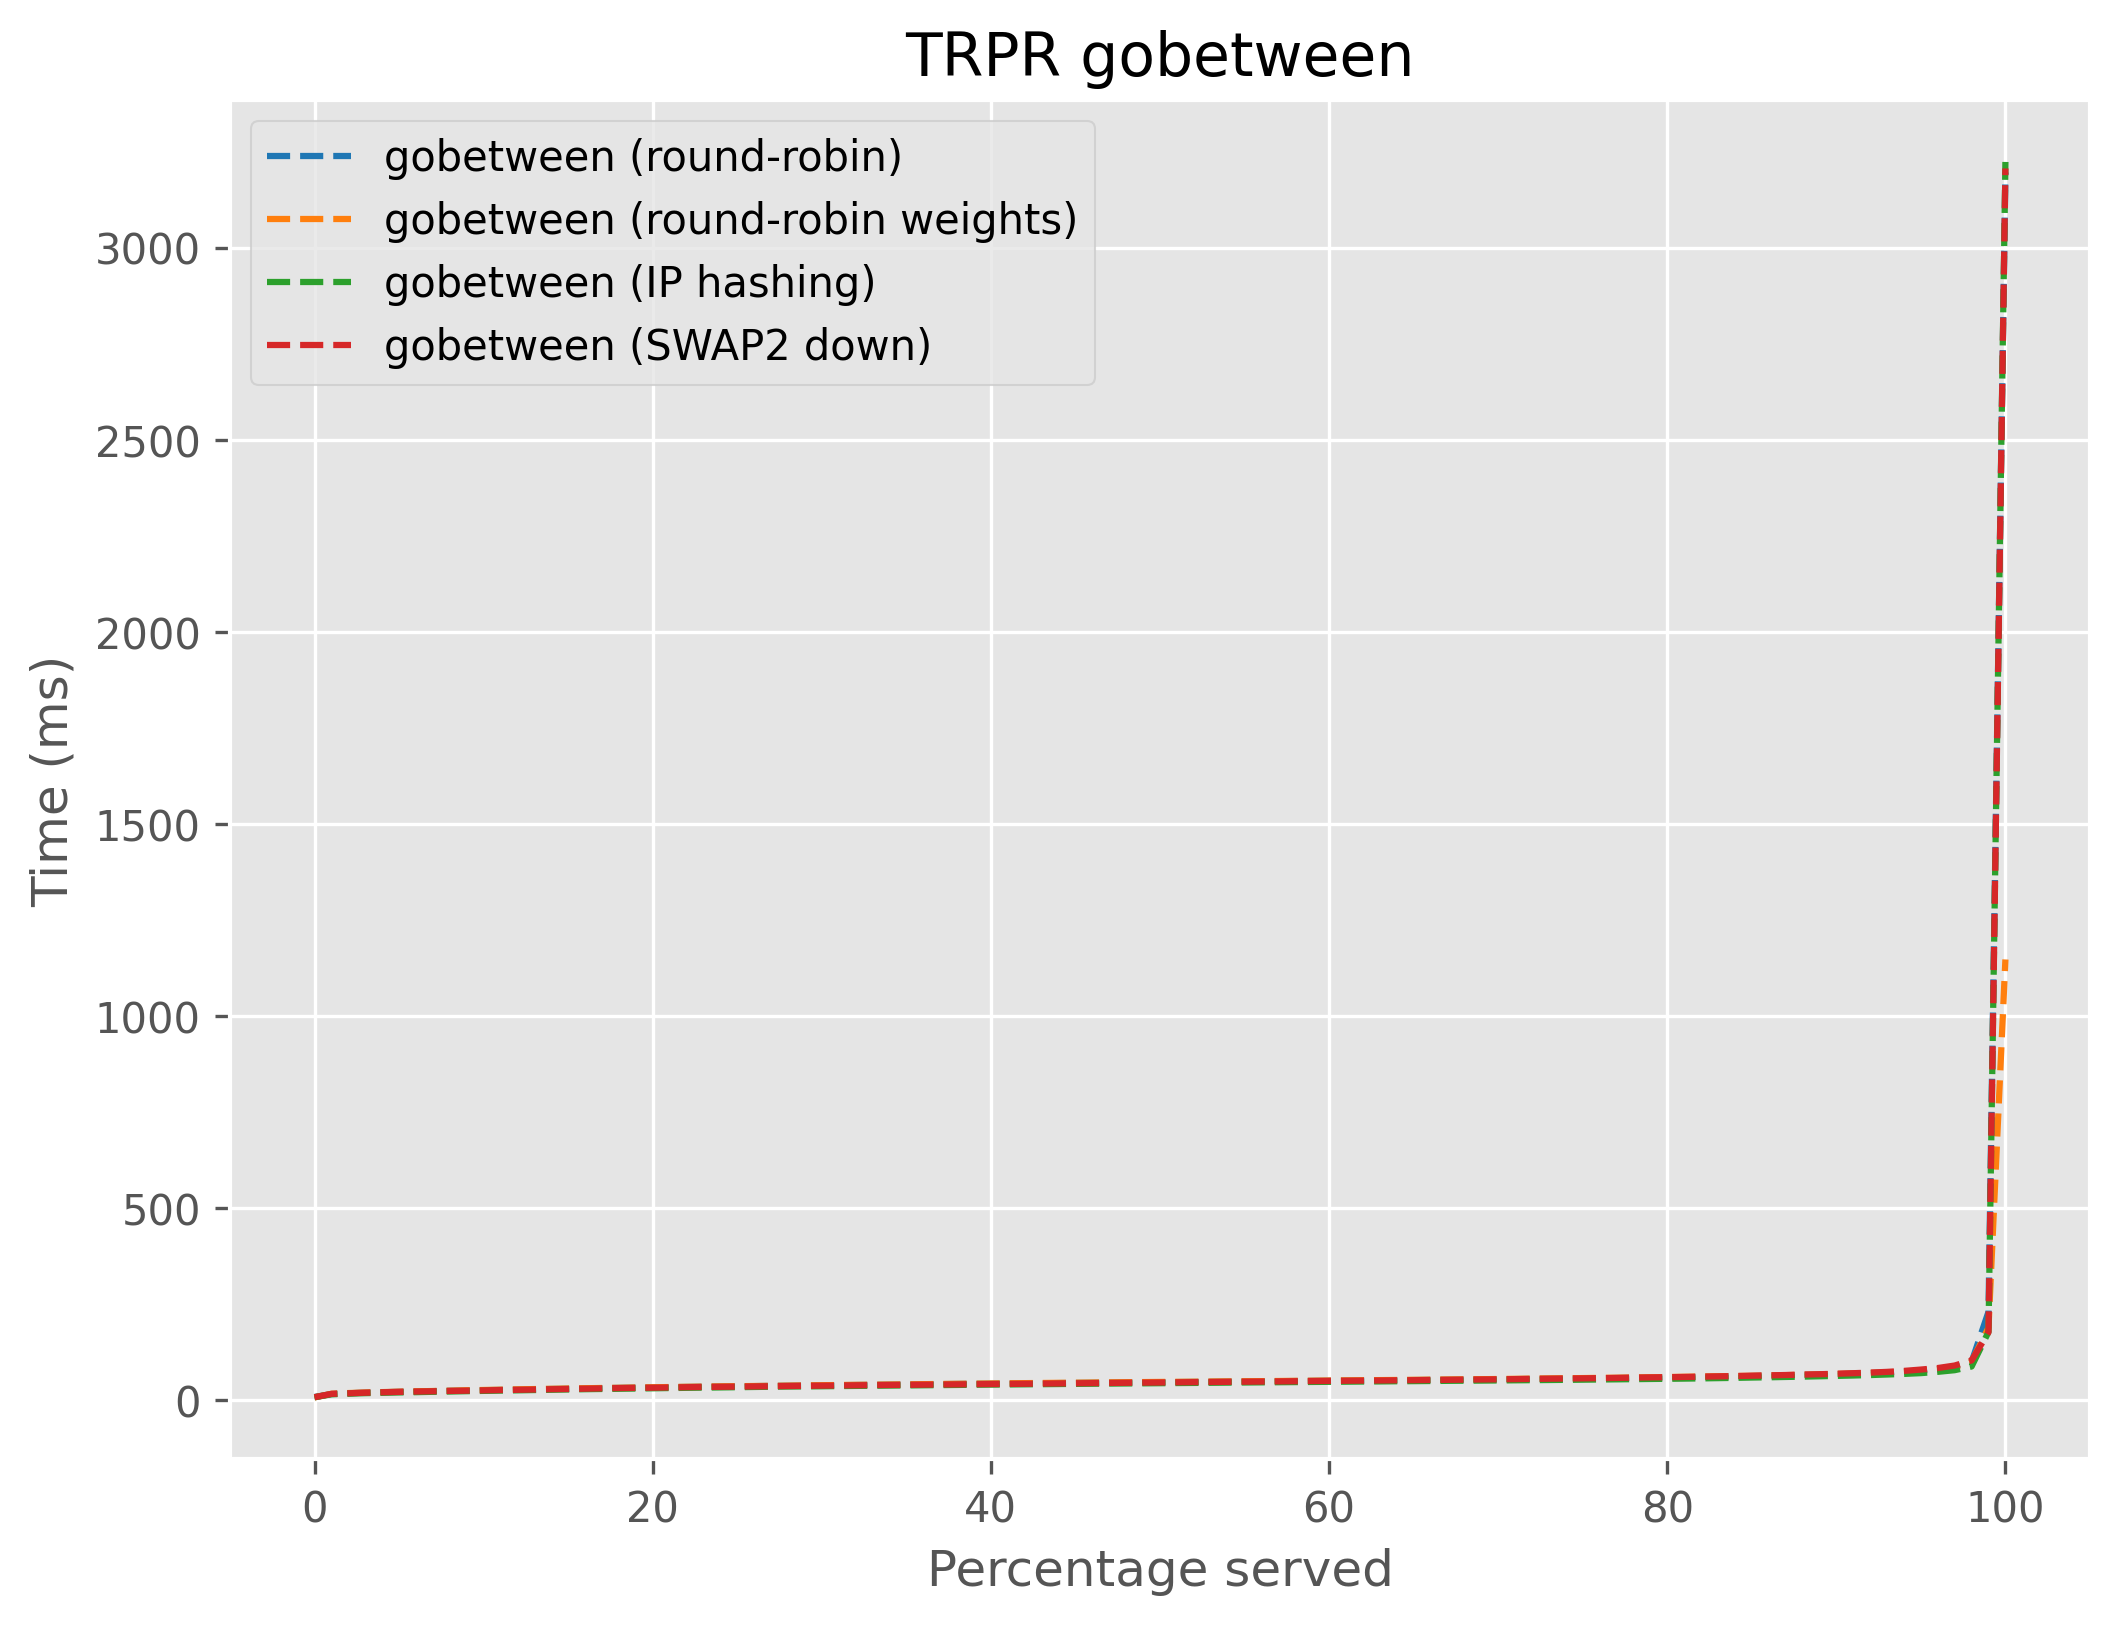

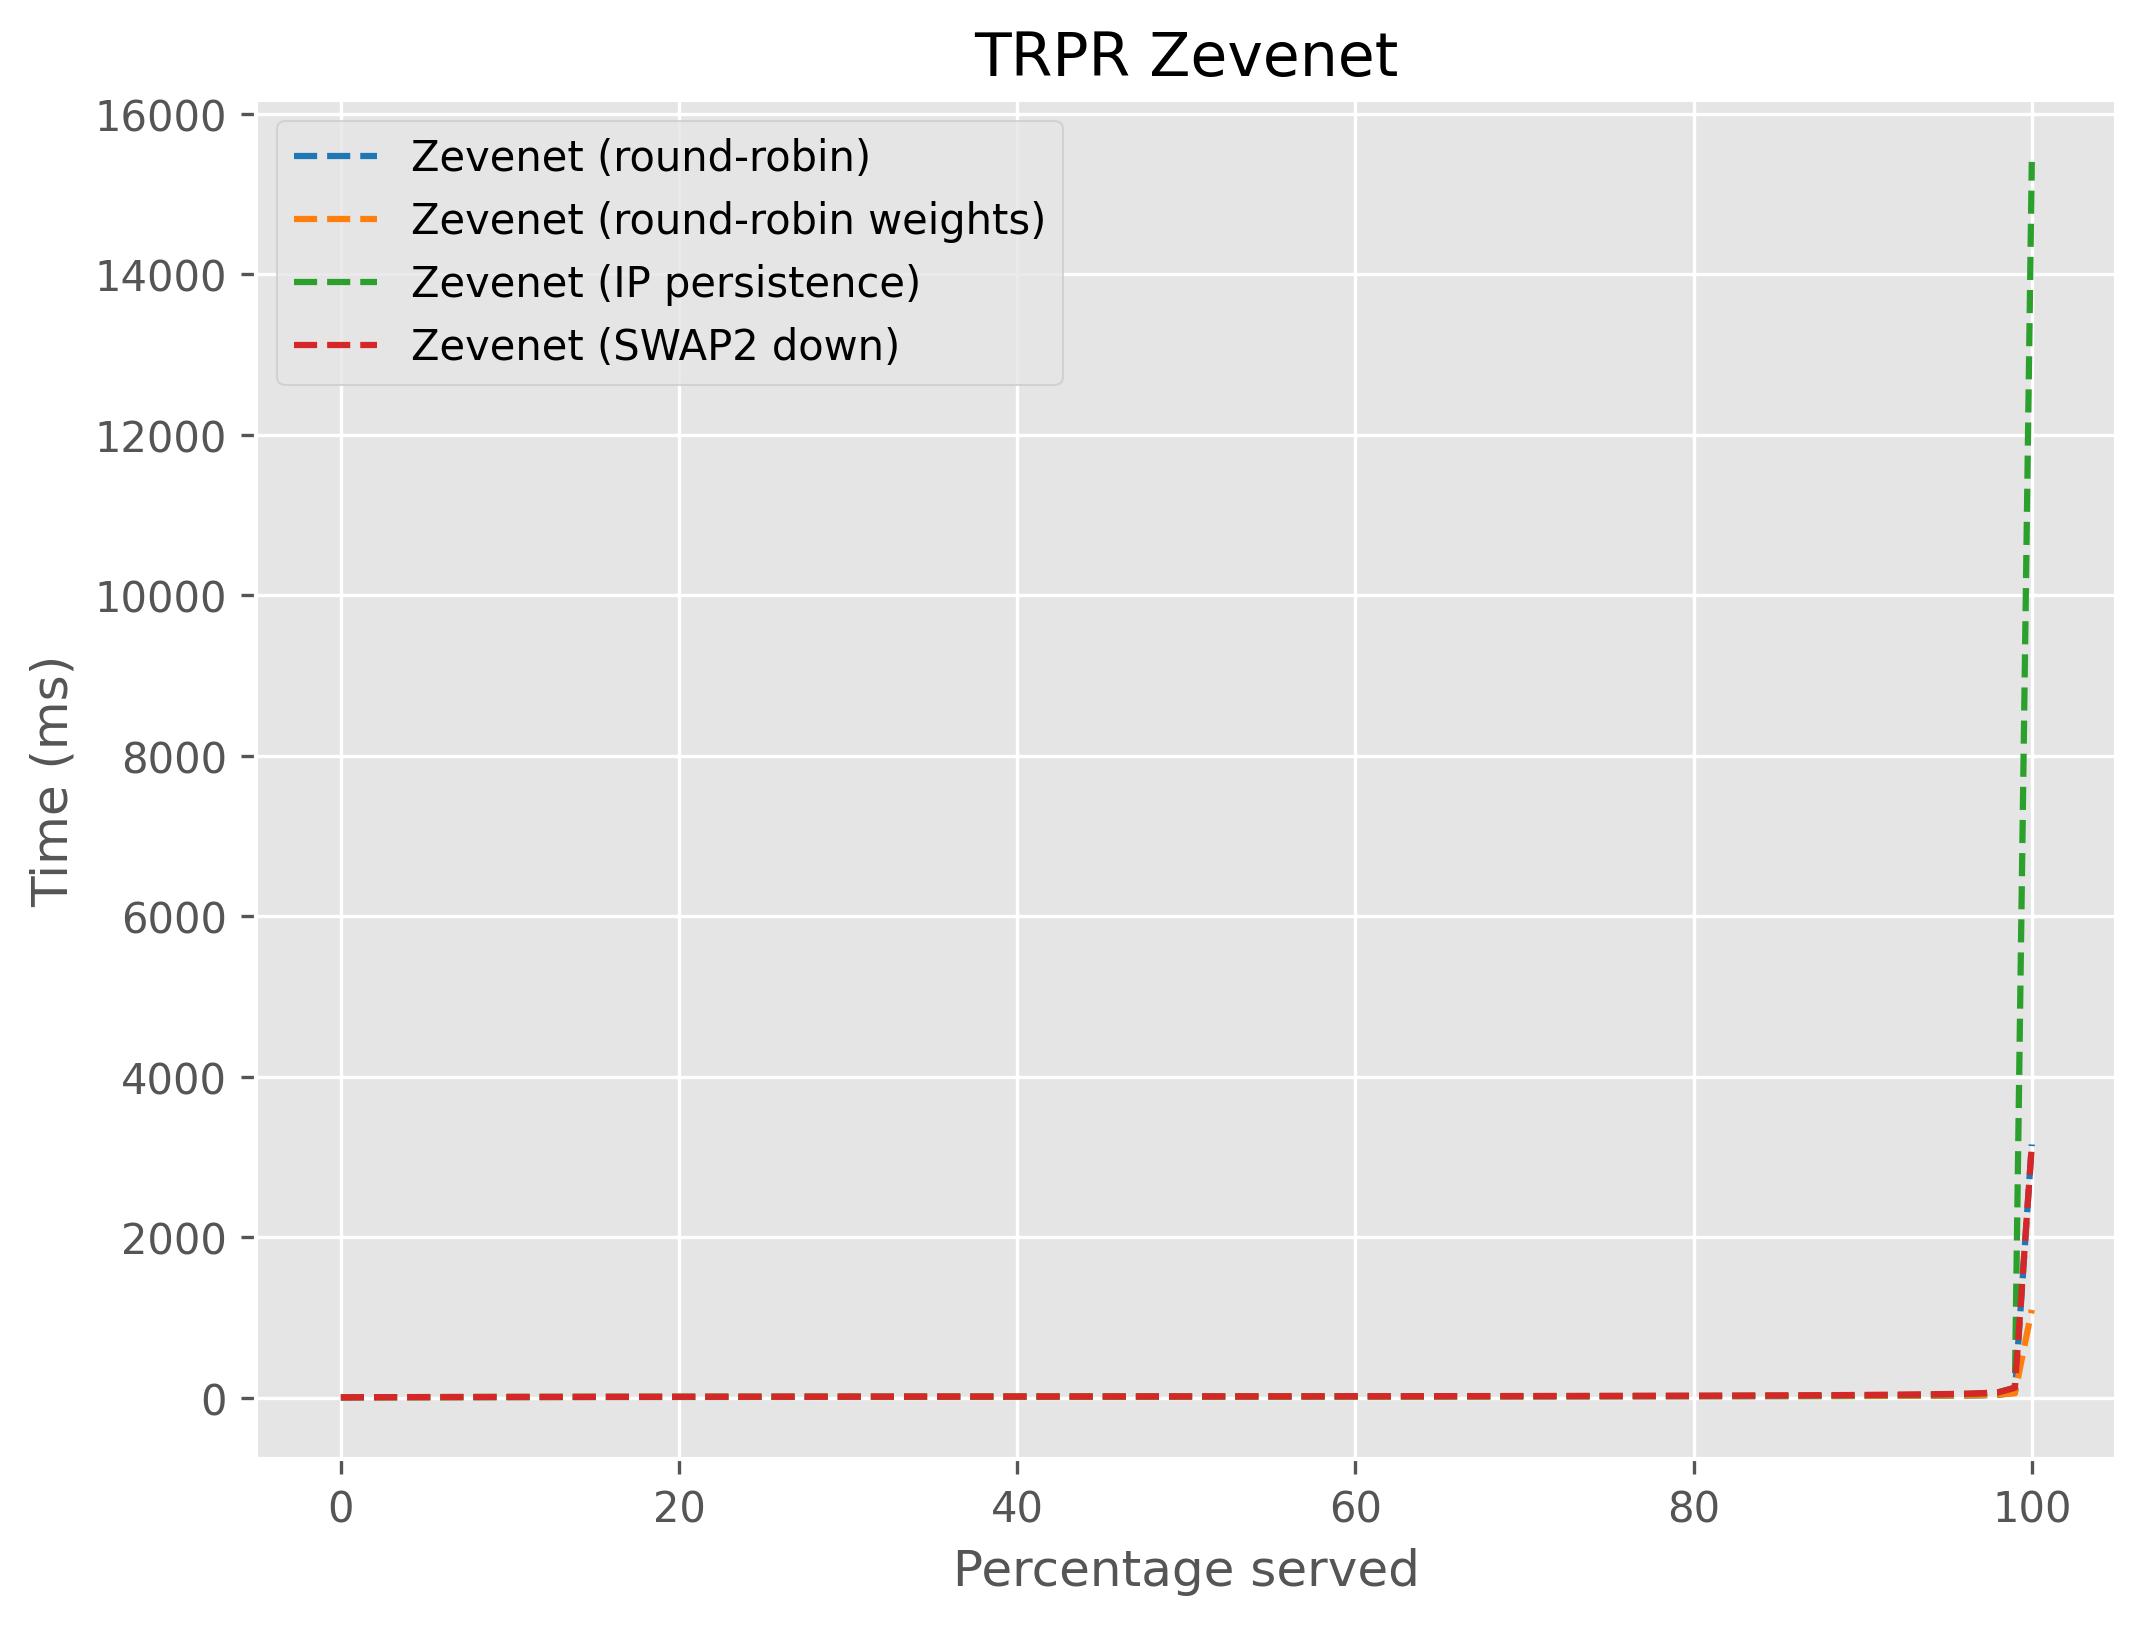

In [5]:
for platform in ['Nginx', 'HAProxy', 'gobetween', 'Zevenet']:
  plot([name for name in data.keys() if platform in name], f'TRPR {platform}')